In [1]:
import pandas as pd
import numpy as np
import env
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('logs.csv')
df.head()

,Unnamed: 0,date,time,endpoint,user,source_ip,cohort_name,start_date,end_date,program_id
0,0,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
1,1,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


In [3]:
df['date']=pd.to_datetime(df.date)
df = df.set_index(df.date)
df= df.drop(columns=['Unnamed: 0'])
df.head()

,date,time,endpoint,user,source_ip,cohort_name,start_date,end_date,program_id
date,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


In [4]:
#split the endpoint into 4 different sections using / as sepeartor and concatenate to the dataframe
df= pd.concat([df, df.endpoint.str.split('/',3, expand = True)], axis=1)
df.head(1)

,date,time,endpoint,user,source_ip,cohort_name,start_date,end_date,program_id,0,1,2,3
date,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,,,None,None


In [5]:
# renaming the columns created after the split of endpoint columns as page 1, page 2,page 3, page 4 respectively
df.rename(columns={0:'page_1',1:'page_2',2:'page_3',3:'page_4'}, inplace = True)
df.head()

,date,time,endpoint,user,source_ip,cohort_name,start_date,end_date,program_id,page_1,page_2,page_3,page_4
date,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,,,None,None
2018-01-26,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,java-ii,None,None,None
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,java-ii,object-oriented-programming,None,None
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,slides,object_oriented_programming,None,None
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,javascript-i,conditionals,None,None


# creating a dataframe for staff, data science, web dev

In [6]:
df.program_id.value_counts()

2    713365
3    103412
1     30548
4         5
Name: program_id, dtype: int64

## from code up portal data science cohort == program id 3, web development cohort == program id (1,2, and 4)



In [7]:
#checking if any one is staff and in data science
dx_df= df[(df.program_id == 3) & (df.cohort_name == 'Staff')]
dx_df.head()

,date,time,endpoint,user,source_ip,cohort_name,start_date,end_date,program_id,page_1,page_2,page_3,page_4
date,,,,,,,,,,,,,


In [8]:
# data science program only
ds_df= df[df.program_id == 3]

In [11]:
#checking if any one is staff and in web dev
dw_df= df[(df.program_id != 3) & (df.cohort_name == 'Staff')]
dw_df.head()

,date,time,endpoint,user,source_ip,cohort_name,start_date,end_date,program_id,page_1,page_2,page_3,page_4
date,,,,,,,,,,,,,
2018-12-06,2018-12-06,14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,97.105.19.58,Staff,2014-02-04,2014-02-04,2,appendix,further-reading,java,intellij-tomcat-configuration
2018-12-06,2018-12-06,14:25:40,javascript-i,314,97.105.19.58,Staff,2014-02-04,2014-02-04,2,javascript-i,None,None,None
2018-12-06,2018-12-06,14:25:41,javascript-i/coffee-project,314,97.105.19.58,Staff,2014-02-04,2014-02-04,2,javascript-i,coffee-project,None,None
2018-12-06,2018-12-06,15:31:29,spring,40,170.248.173.247,Staff,2014-02-04,2014-02-04,2,spring,None,None,None
2018-12-06,2018-12-06,15:31:33,spring/fundamentals/security,40,170.248.173.247,Staff,2014-02-04,2014-02-04,2,spring,fundamentals,security,None


In [9]:
# web developers dataframe
web_df = df[(df.program_id != 3) & (df.cohort_name != 'Staff')]
web_df.cohort_name.value_counts()

Ceres         40730
Zion          38096
Jupiter       37109
Fortuna       36902
Voyageurs     35636
Ganymede      33844
Apex          33568
Deimos        32888
Teddy         30926
Hyperion      29855
Betelgeuse    29356
Ulysses       28534
Europa        28033
Xanadu        27749
Wrangell      25586
Andromeda     25359
Kalypso       23691
Yosemite      20743
Bash          17713
Luna          16623
Marco         16397
Lassen         9587
Arches         8890
Sequoia        7444
Neptune        7276
Olympic        4954
Kings          2845
Pinnacles      2158
Hampton        1712
Oberon         1672
Quincy         1237
Niagara         755
Mammoth         691
Glacier         598
Joshua          302
Ike             253
Badlands         93
Franklin         72
Apollo            5
Denali            4
Everglades        1
Name: cohort_name, dtype: int64

In [10]:
#staff only dataframe
staff_df = df[df.cohort_name == 'staff']

# 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [18]:
ds_df['endpoint'].value_counts()

/                                           8358
search/search_index.json                    2203
classification/overview                     1785
1-fundamentals/modern-data-scientist.jpg    1655
1-fundamentals/AI-ML-DL-timeline.jpg        1651
                                            ... 
python/custom-sorting-functions                1
imports                                        1
java-i/console-io                              1
appendix/univariate_regression_in_excel        1
6-regression/8-Project                         1
Name: endpoint, Length: 682, dtype: int64

In [34]:
ds_df[['page_1','page_2','page_3']].value_counts()

page_1          page_2                    page_3                          
appendix        cli                       5-creating-files-and-directories    204
                                          2-listing-files                     168
                                          6-moving-files                      167
                                          4-navigating-the-filesystem         165
fundamentals    cli                       listing-files                       165
appendix        cli                       1-intro                             164
fundamentals    cli                       overview                            163
appendix        cli                       3-file-paths                        158
fundamentals    cli                       intro                               157
appendix        cli                       0-overview                          157
                                          7-more-topics                       140
fundamentals    cli    

<AxesSubplot:ylabel='page_1,page_2,page_3'>

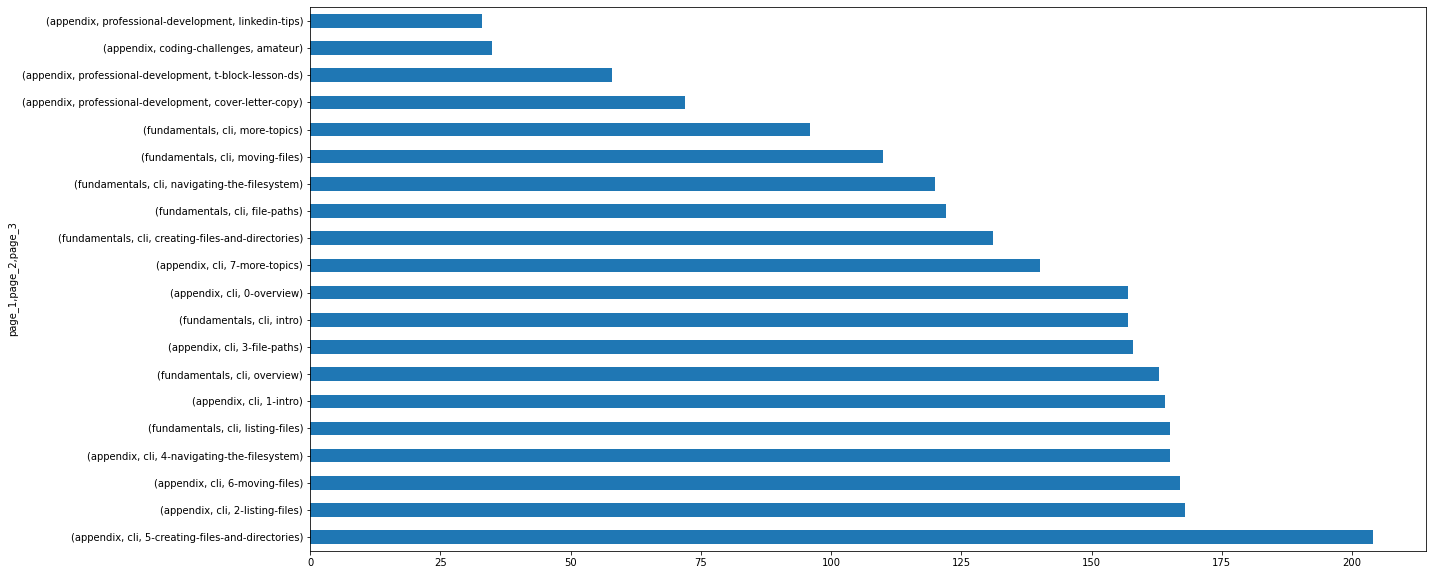

In [32]:
# for data science cohort
plt.figure(figsize=(20,10))
ds_df[['page_1','page_2','page_3']].value_counts().head(20).plot(kind='barh')

<AxesSubplot:ylabel='endpoint'>

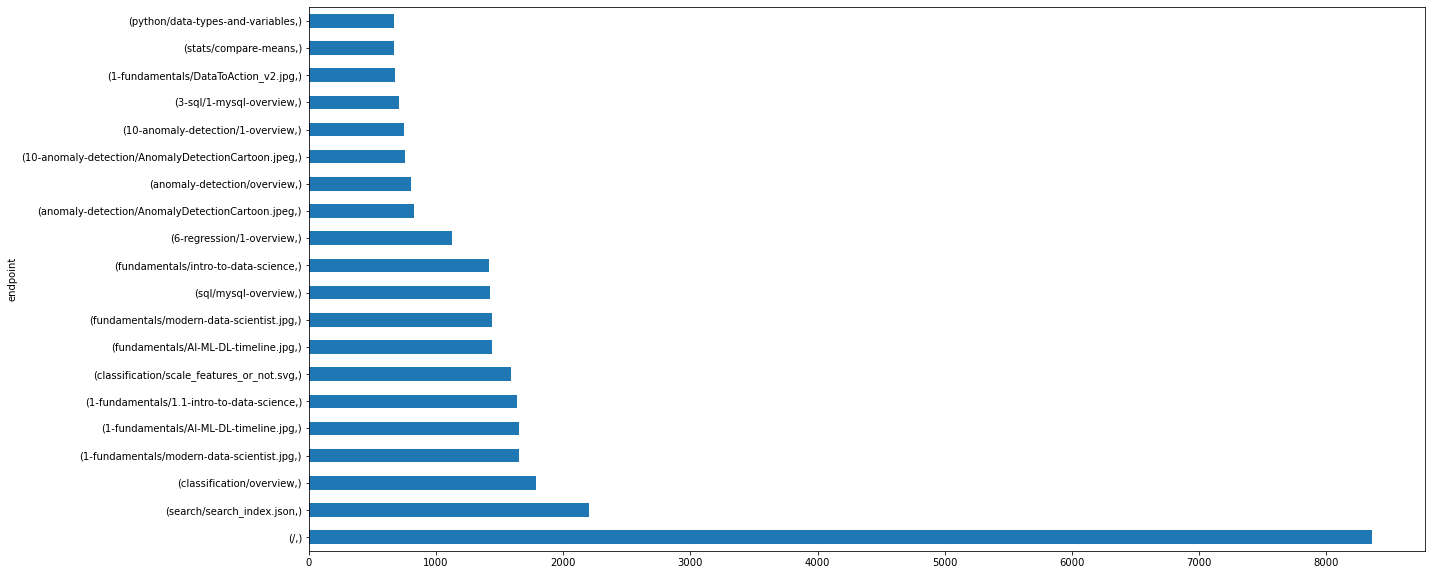

In [35]:
# data science
plt.figure(figsize=(20,10))
ds_df[['endpoint']].value_counts().head(20).plot(kind='barh')

In [38]:
# for web developement
plt.figure(figsize=(20,10))
web_df[['endpoint']].value_counts()

endpoint                                                   
/                                                              31156
toc                                                            16669
javascript-i                                                   16376
search/search_index.json                                       13982
html-css                                                       11827
                                                               ...  
content/examples/appendix                                          1
content/control-structures-ii                                      1
content/conditionals.html                                          1
content/appendix/javascript/javascript/functions/scope.html        1
wp-login                                                           1
Length: 1289, dtype: int64

<Figure size 1440x720 with 0 Axes>

In [36]:
web_df[['page_1','page_2','page_3']].value_counts()

page_1        page_2           page_3                                         
javascript-i  introduction     working-with-data-types-operators-and-variables    7041
html-css      css-i            flexbox                                            6187
              css-ii           bootstrap-grid-system                              6140
                               bootstrap-introduction                             5682
spring        fundamentals     views                                              5158
                                                                                  ... 
cohorts       24               capstone-all                                          1
mysql                          functions                                             1
                               extra-exercises                                       1
appendix      further-reading  css-grid-additional-features                          1
PreWork       PreWork          cli                 

<AxesSubplot:ylabel='page_1,page_2,page_3'>

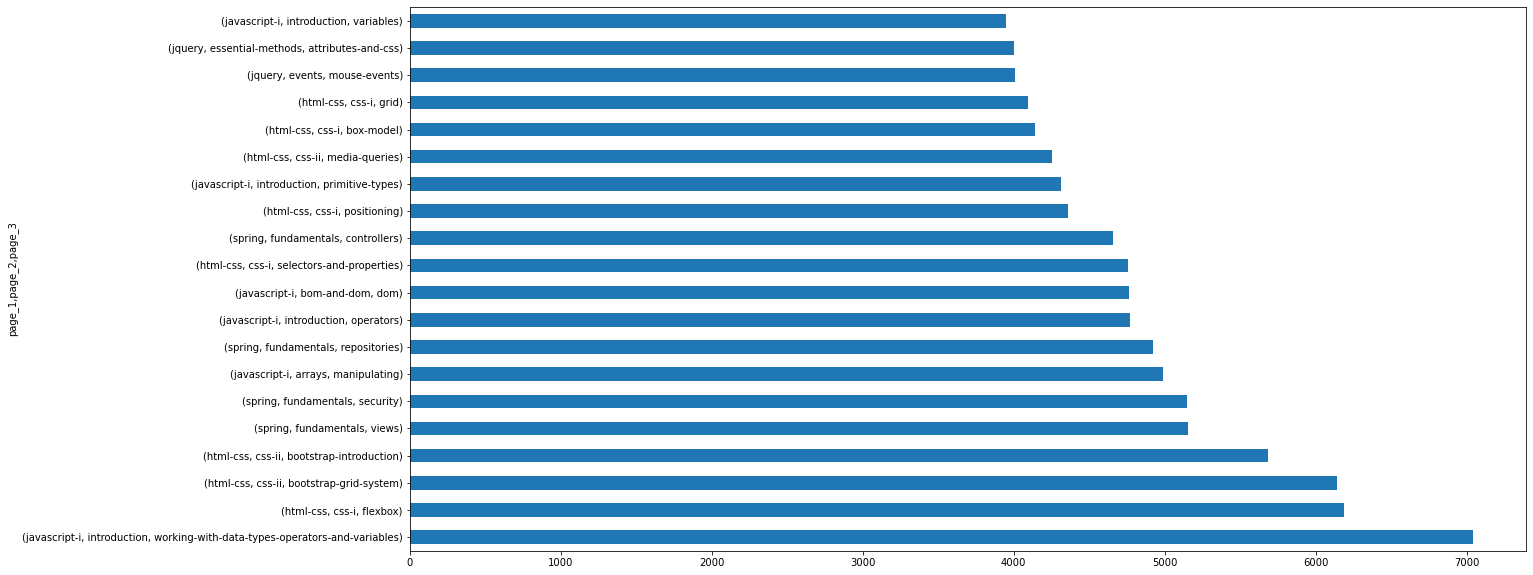

In [37]:
# for web devlopers by page
plt.figure(figsize=(20,10))
web_df[['page_1','page_2','page_3']].value_counts().head(20).plot(kind='barh')

## takeaways from question 1
- web development program most visited "**javascript-i/introduction/ working-with-data-types-operators-and-variables**" 
- data science program accessed most page :" **appendix/open_data/www.who.int/ research/en**"  

# 7. Which lessons are least accessed?

<AxesSubplot:ylabel='page_1,page_2,page_3'>

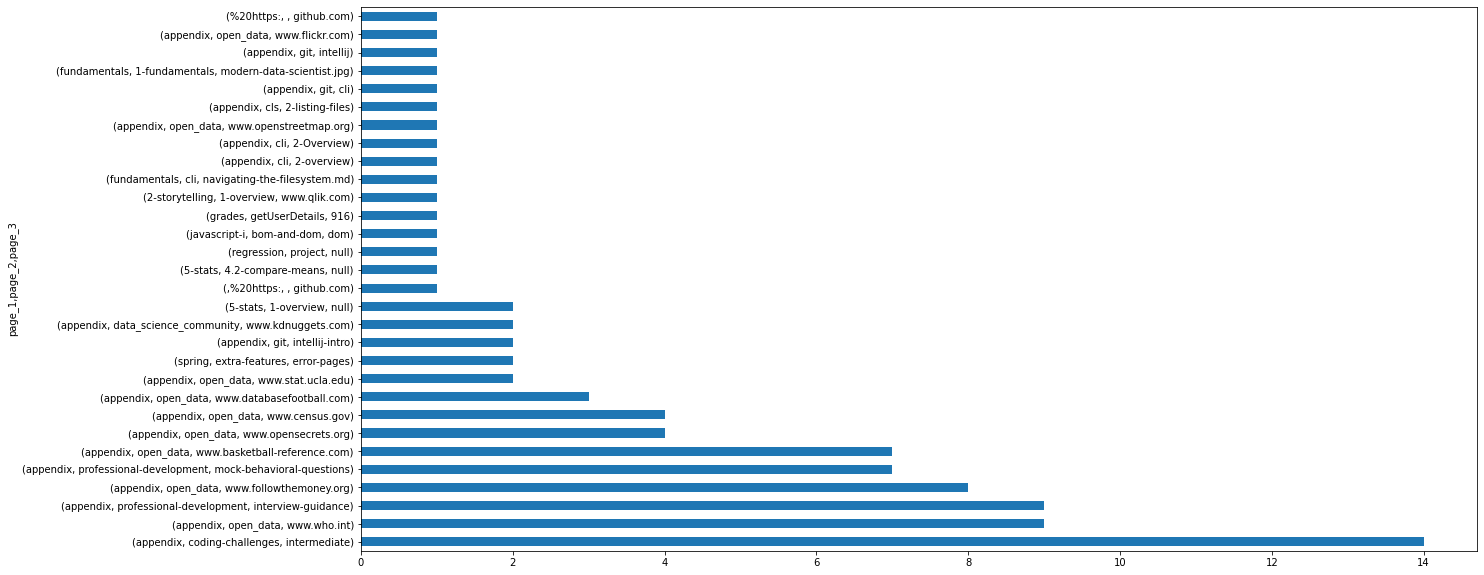

In [49]:
# for data science cohorts
plt.figure(figsize=(20,10))
ds_df[['page_1','page_2','page_3']].value_counts().tail(30).plot(kind='barh')

<AxesSubplot:ylabel='page_1,page_2,page_3'>

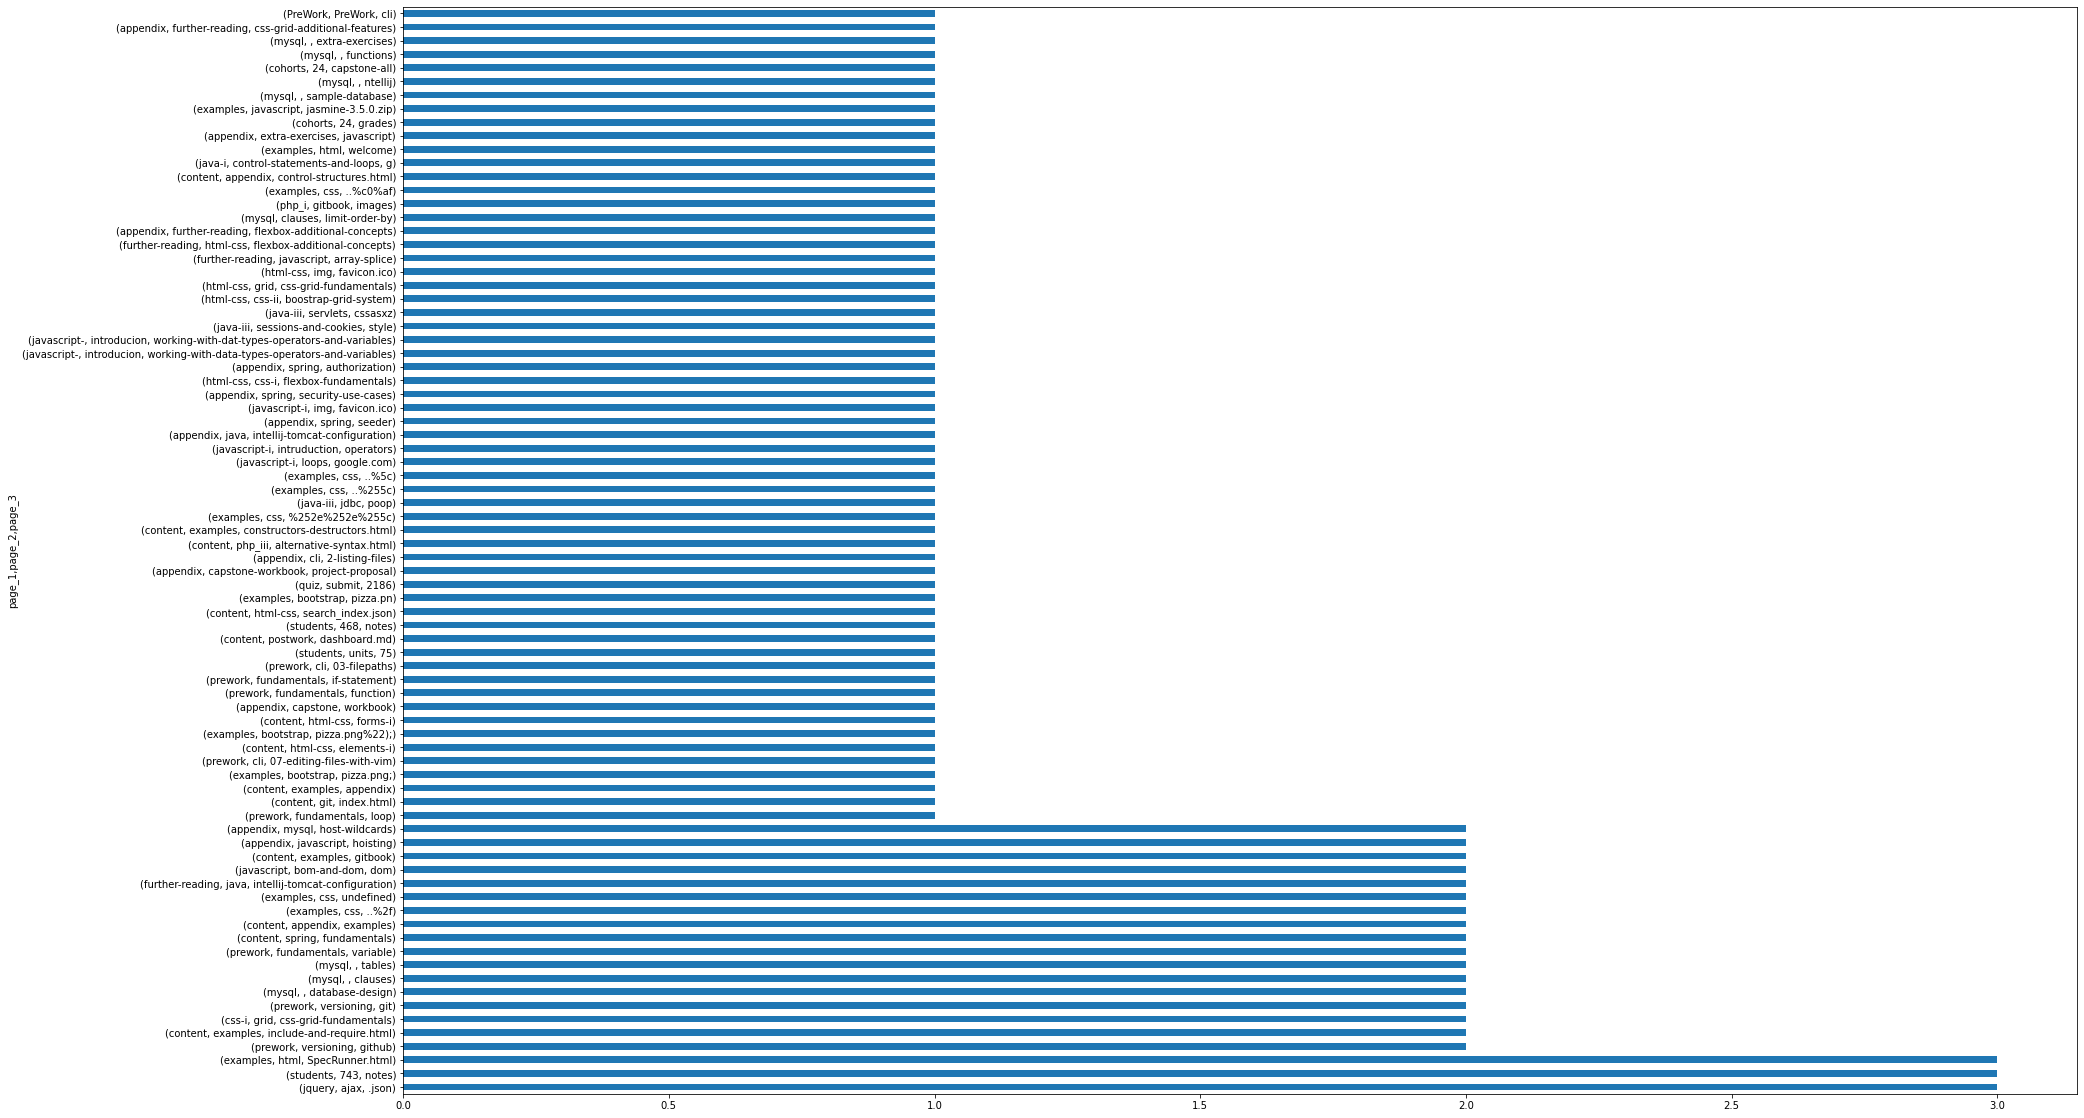

In [68]:
plt.figure(figsize=(30,20))
web_df[['page_1','page_2','page_3']].value_counts().tail(80).plot(kind='barh')

In [ ]:
pd.set_options('display_max rows', None)

In [69]:
web = pd.DataFrame(web_df[['page_1','page_2','page_3']].value_counts())
web

0
page_1       page_2          page_3                                               
javascript-i introduction    working-with-data-types-operators-and-variables  7041
html-css     css-i           flexbox                                          6187
             css-ii          bootstrap-grid-system                            6140
                             bootstrap-introduction                           5682
spring       fundamentals    views                                            5158
...                                                                            ...
cohorts      24              capstone-all                                        1
mysql                        functions                                           1
                             extra-exercises                                     1
appendix     further-reading css-grid-additional-features                        1
PreWork      PreWork         cli                                                 1

[331 rows x 1 columns]

# Takeaways from Question 7
- least accessed lesson on Data Science program:" "
- least accessed lesson on Web Developer program:" "

# 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [56]:
# data science cohort names
ds_df.cohort_name.unique()

array(['Bayes', 'Curie', 'Darden', 'Easley', 'Florence'], dtype=object)

Cohort : Bayes


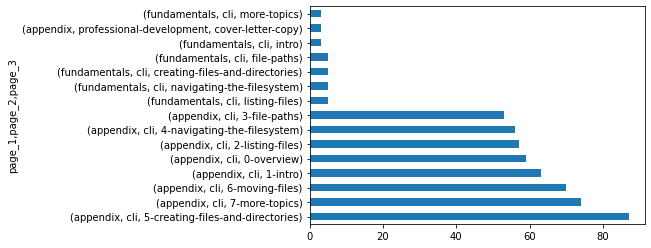

Cohort : Curie


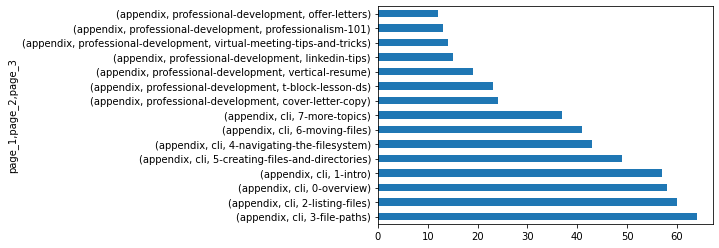

Cohort : Darden


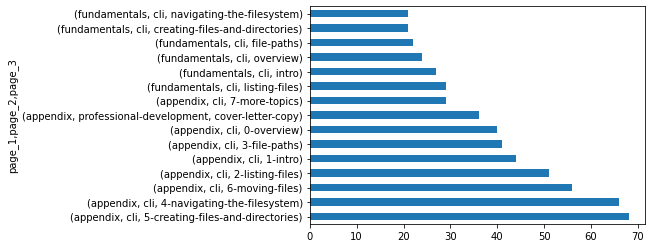

Cohort : Easley


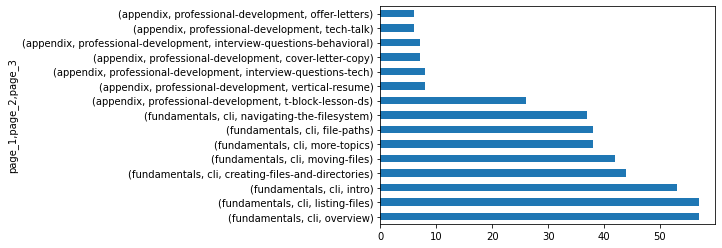

Cohort : Florence


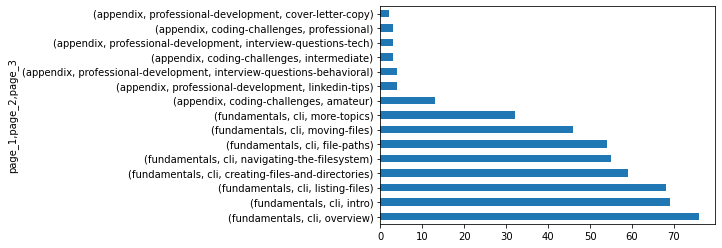

In [62]:
val= list(ds_df.cohort_name.unique())

for x in val:
    print(f'Cohort : {x}')
    ds_sub_df= ds_df[ds_df.cohort_name== x]
    ds_sub_df[['page_1','page_2','page_3']].value_counts().head(15).plot(kind='barh')
    plt.ylabel=('page visited')
    plt.xlabel =( 'times visited') 
    plt.show()
    

Cohort : Hampton


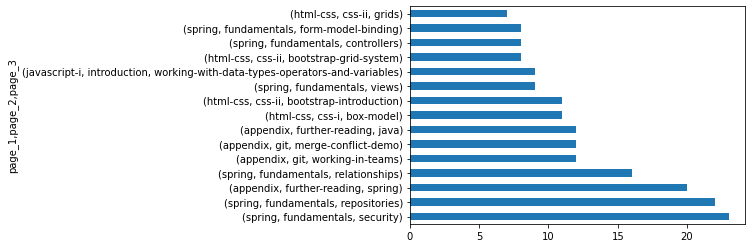

--------------------------------------------------------
Cohort : Teddy


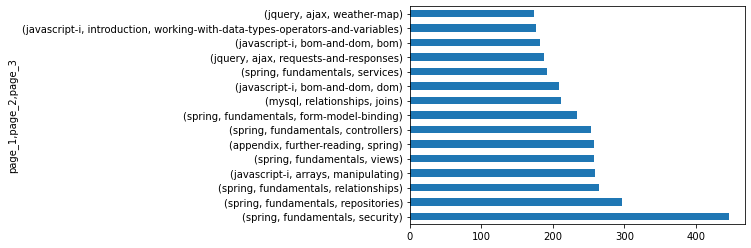

--------------------------------------------------------
Cohort : Sequoia


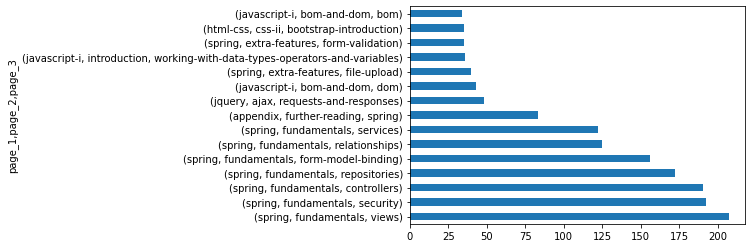

--------------------------------------------------------
Cohort : Arches


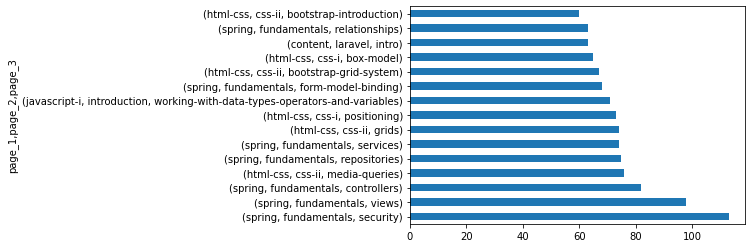

--------------------------------------------------------
Cohort : Niagara


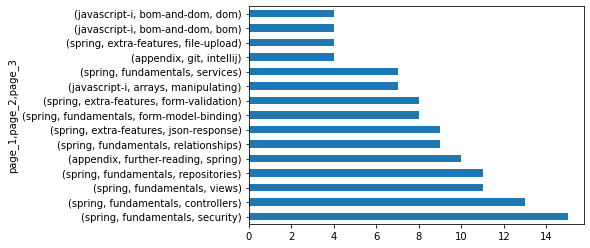

--------------------------------------------------------
Cohort : Pinnacles


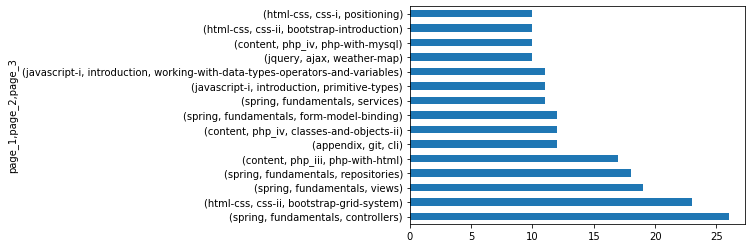

--------------------------------------------------------
Cohort : Quincy


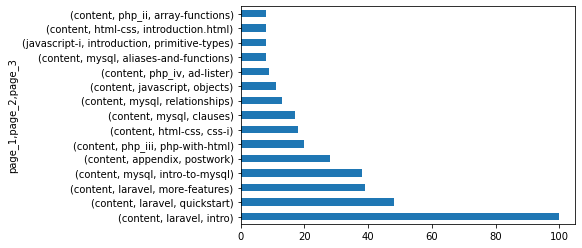

--------------------------------------------------------
Cohort : Kings


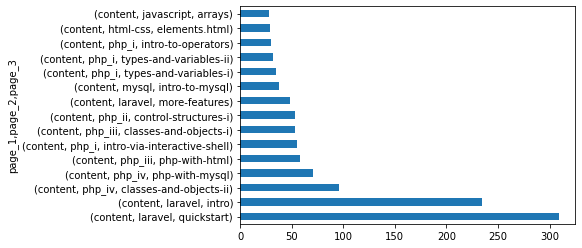

--------------------------------------------------------
Cohort : Lassen


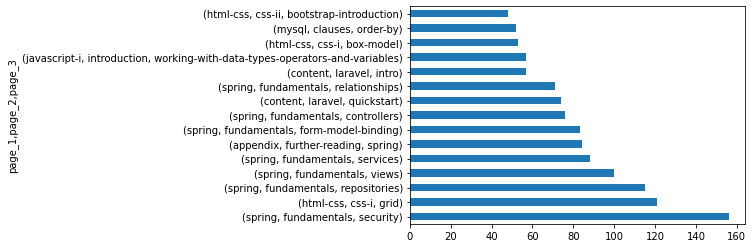

--------------------------------------------------------
Cohort : Mammoth


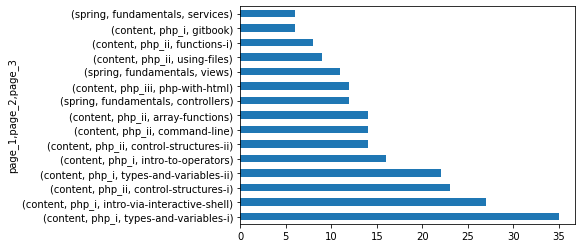

--------------------------------------------------------
Cohort : Glacier


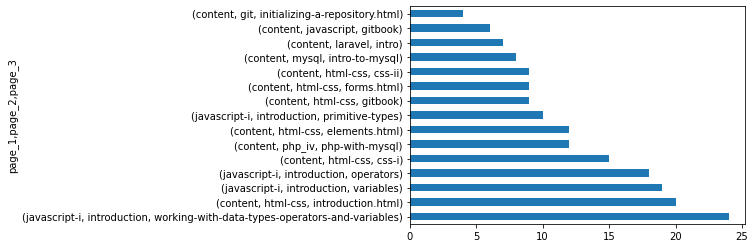

--------------------------------------------------------
Cohort : Denali


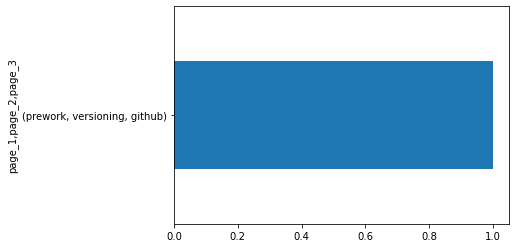

--------------------------------------------------------
Cohort : Joshua


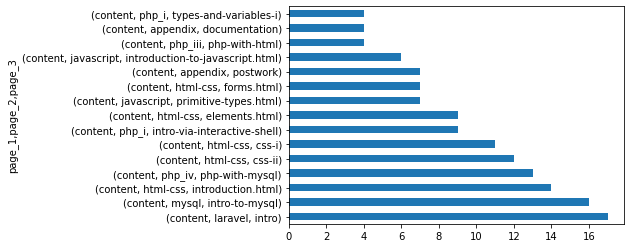

--------------------------------------------------------
Cohort : Olympic


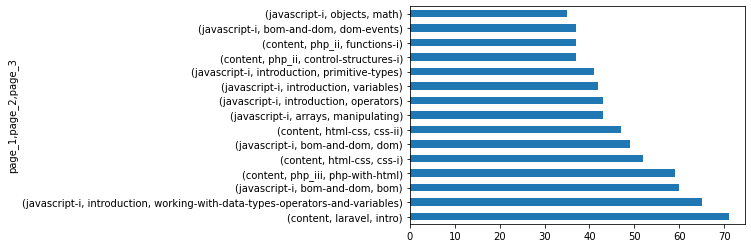

--------------------------------------------------------
Cohort : Ulysses


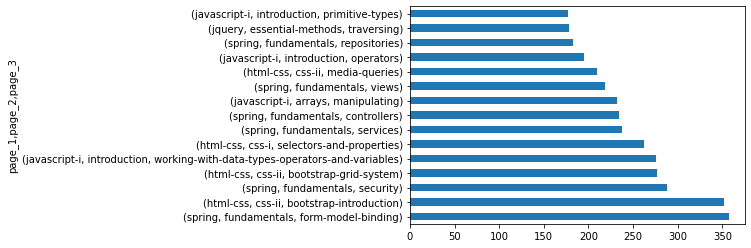

--------------------------------------------------------
Cohort : Badlands


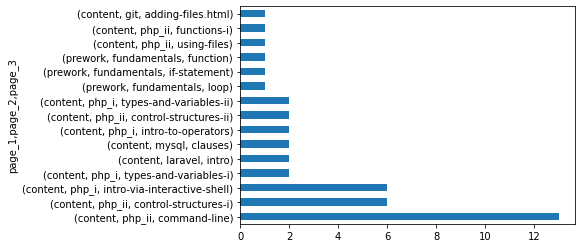

--------------------------------------------------------
Cohort : Apollo


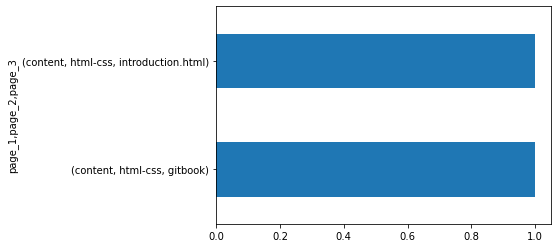

--------------------------------------------------------
Cohort : Ike


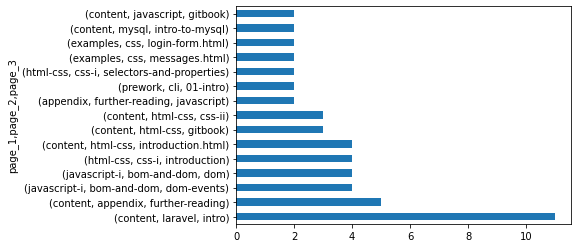

--------------------------------------------------------
Cohort : Voyageurs


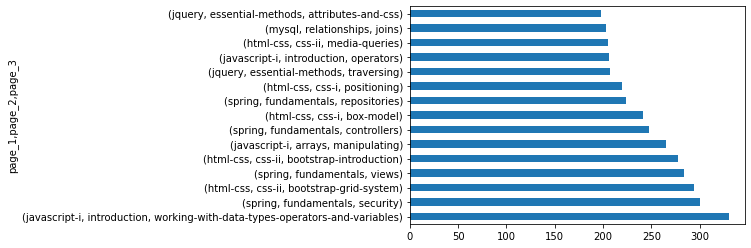

--------------------------------------------------------
Cohort : Wrangell


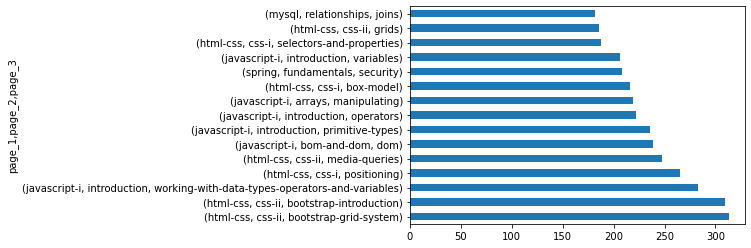

--------------------------------------------------------
Cohort : Xanadu


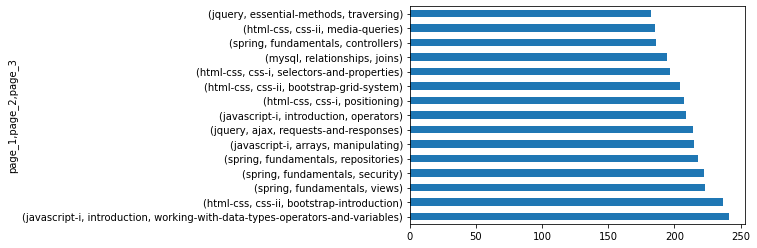

--------------------------------------------------------
Cohort : Franklin


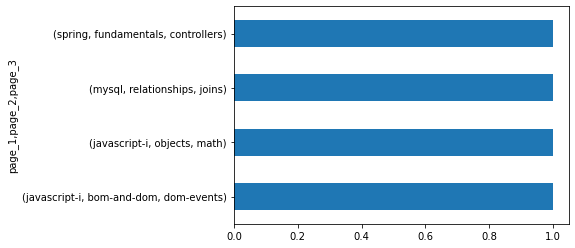

--------------------------------------------------------
Cohort : Yosemite


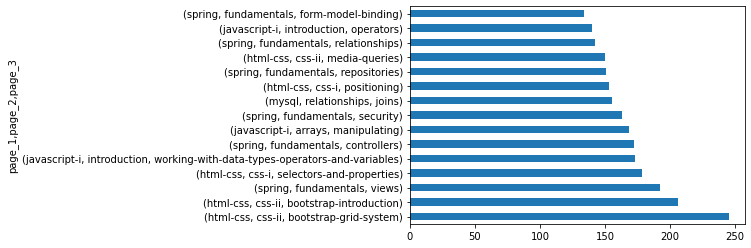

--------------------------------------------------------
Cohort : Zion


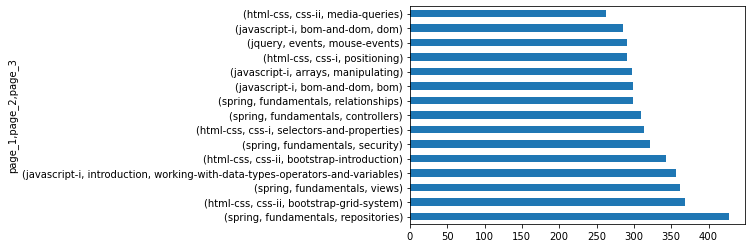

--------------------------------------------------------
Cohort : Andromeda


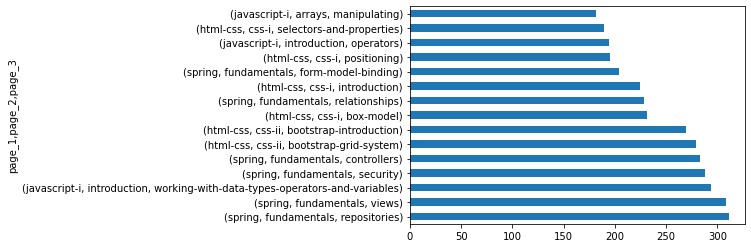

--------------------------------------------------------
Cohort : Betelgeuse


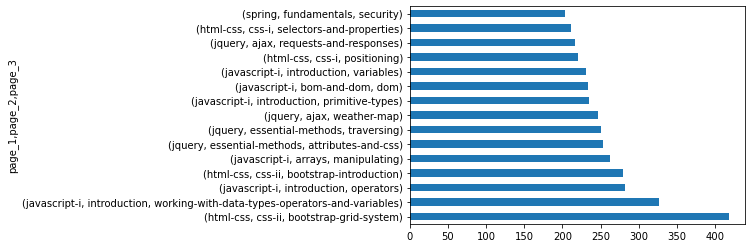

--------------------------------------------------------
Cohort : Ceres


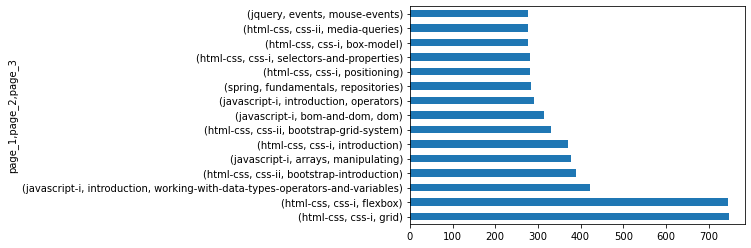

--------------------------------------------------------
Cohort : Deimos


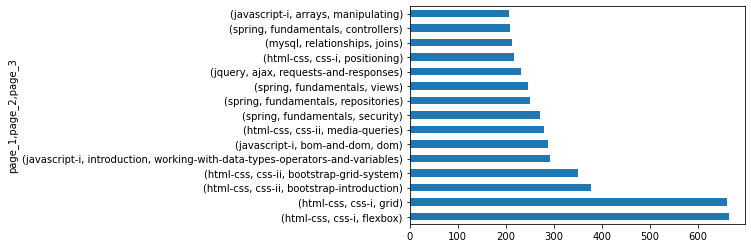

--------------------------------------------------------
Cohort : Europa


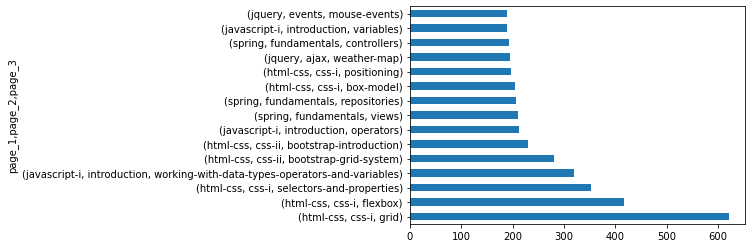

--------------------------------------------------------
Cohort : Fortuna


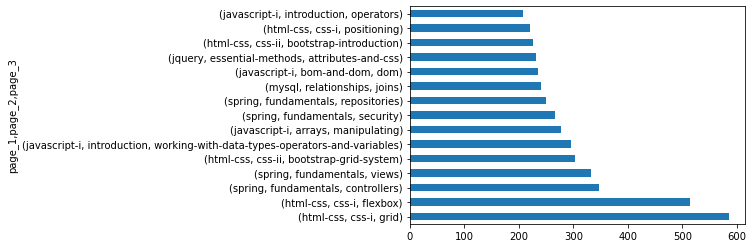

--------------------------------------------------------
Cohort : Apex


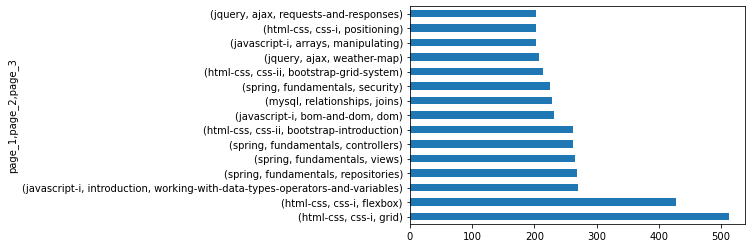

--------------------------------------------------------
Cohort : Ganymede


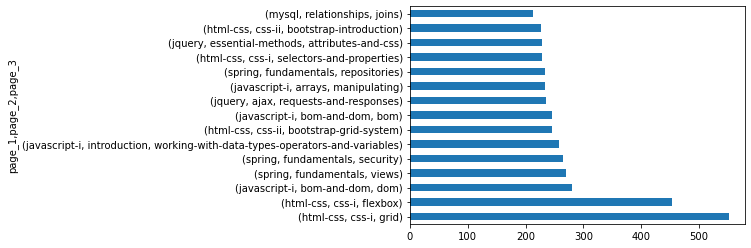

--------------------------------------------------------
Cohort : Everglades


IndexError: index 0 is out of bounds for axis 0 with size 0

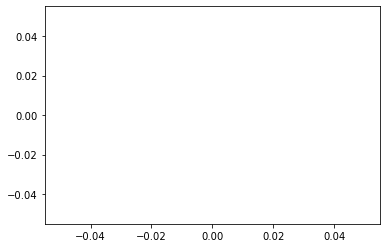

In [64]:
# for web development cohort
val= list(web_df.cohort_name.unique())

for x in val:
    print(f'Cohort : {x}')
    web_sub_df= web_df[web_df.cohort_name== x]
    web_sub_df[['page_1','page_2','page_3']].value_counts().head(15).plot(kind='barh')
    plt.ylabel=('page visited')
    plt.xlabel =( 'times visited') 
    plt.show()
    print('--------------------------------------------------------')
    

# 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [65]:
# for data science students checking the web dev

# unique pages visited 
page= list(ds_df.endpoint.unique())

# list of unique pages in web dev
web_keyword = list(web_df.endpoint.unique())

# create a loop to cross check a page visited by ds students that matches with unique pages from web dev cohort

count= 0
lst=[]
for x in web_keyword:
    if x in page:
        print(x)
        
        count+= 1
        lst.append(x)
        
print(count)
print(lst)

/
java-ii
java-ii/object-oriented-programming
javascript-i/conditionals
mkdocs/search_index.json
javascript-i
spring
appendix
index.html
java-i
html-css/introduction
javascript-i/bom-and-dom/dom
mysql
html-css
git/cli
appendix/documentation
jquery
javascript-ii
html-css/elements
html-css/forms
java-iii
spring/extra-features/error-pages
java-i/console-io
git
spring/extra-features/error-pages/asdfasdf
appendix/postwork
appendix/git/intellij-intro
appendix/git/intellij
appendix/git/cli
appendix/git
functions
group-by
.gitignore
toc
search/search_index.json
login
examples
Pipeline_Demo
database-design
AnomalyDetectionCartoon.jpeg
search
3-sql/1-mysql-overview
4-python/1-overview
4-python/2-introduction-to-python
4-python/3-data-types-and-variables
1-fundamentals/2.2-excel-functions
1-fundamentals/2.3-visualization-with-excel
1-fundamentals/project
2-storytelling/3-tableau
6-regression/1-overview
10-anomaly-detection/1-overview
10-anomaly-detection/AnomalyDetectionCartoon.jpeg
11-nlp/1-over

In [70]:
# web dev students visiting data science topics

# list of unique pages visited by web dev cohort
page = list(web_df.endpoint.unique())

# unique pages visited by data science cohort
ds_keyword = list(ds_df.endpoint.unique())

count= 0
cross_curr=[]
# loop
for x in ds_keyword:
    if x in page:
        print(x)
        
        count+= 1
        cross_curr.append(web_df[web_df== x].user)
        
print(count)
print(cross_curr)

/
3-sql/1-mysql-overview
2-storytelling/bad-charts
2-storytelling/misleading1_baseball.jpg
2-storytelling/misleading1_fox.jpg
2-storytelling/misleading3_deaths.jpg
appendix/cli-git-overview
1-fundamentals/1.1-intro-to-data-science
1-fundamentals/modern-data-scientist.jpg
1-fundamentals/AI-ML-DL-timeline.jpg
1-fundamentals/1.2-data-science-pipeline
1-fundamentals/DataToAction_v2.jpg
search/search_index.json
1-fundamentals/1.3-pipeline-demo
6-regression/1-overview
10-anomaly-detection/1-overview
10-anomaly-detection/AnomalyDetectionCartoon.jpeg
11-nlp/1-overview
6-regression/2-regression-excel
6-regression/3.1-acquire-and-prep
6-regression/3.3-explore
7-classification/6.4-knn
5-stats/1-overview
1-fundamentals/2.2-excel-functions
1-fundamentals/project
1-fundamentals/2.4-more-excel-features
1-fundamentals/2.3-visualization-with-excel
2-storytelling/1-overview
2-storytelling/3-tableau
3-sql/3-databases
3-sql/7-functions
3-sql/8-group-by
2-storytelling/2.1-understand
2-storytelling/2.2-crea

# takeaways from question 5
- access to both curriculum s were not shut off
- it is evident that there is cross referencing between the cohorts